In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

### Importamos los datos

In [2]:
url_wines="https://raw.githubusercontent.com/rociochavezmx/Rocio-Chavez-youtube-Files/master/caracteristicas%20de%20vinos.csv"
data=pd.read_csv(url_wines)

In [3]:
data.head()

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Vino,178.0,89.500000,51.528309,1.00,45.2500,89.500,133.7500,178.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [5]:
data.aggregate([np.min,np.max]).T

,amin,amax
Vino,1.00,178.00
Alcohol,11.03,14.83
Malic,0.74,5.80
Ash,1.36,3.23
Alcalinity,10.60,30.00
Magnesium,70.00,162.00
Phenols,0.98,3.88
Flavanoids,0.34,5.08
Nonflavanoids,0.13,0.66
Proanthocyanins,0.41,3.58


In [6]:
data.drop(columns=["Vino"],axis=1,inplace=True)

In [7]:
#escalamos los datos
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_scaled=scaler.fit_transform(data)

In [8]:
data_scaled[:3]

array([[0.84210526, 0.1916996 , 0.57219251, 0.25773196, 0.61956522,
        0.62758621, 0.57383966, 0.28301887, 0.59305994, 0.37201365,
        0.45528455, 0.97069597, 0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , 0.03092784, 0.32608696,
        0.57586207, 0.51054852, 0.24528302, 0.27444795, 0.26450512,
        0.46341463, 0.78021978, 0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, 0.41237113, 0.33695652,
        0.62758621, 0.61181435, 0.32075472, 0.75709779, 0.37542662,
        0.44715447, 0.6959707 , 0.64693295]])

In [9]:
#buscar la cantidad optima de clusters

#usaremos el metodo de jambu

def plot_best_clusters(data):
    wcss=[]
    for i in range(1,16):
        kmean=KMeans(n_clusters=i,max_iter=300)
        kmean.fit(data)
        wcss.append(kmean.inertia_)
    plt.plot(range(1,16),wcss,"bo-")
    plt.xlabel("n_clusters")
    plt.ylabel("wcss")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()
        

C:\Users\JOHAN\anaconda3\envs\mlearning\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "
No handles with labels found to put in legend.


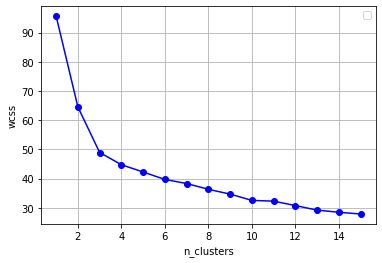

In [10]:
plot_best_clusters(data_scaled)

In [11]:
#ahora agrego los valores predecidos
kmean=KMeans(n_clusters=3)
kmean.fit(data_scaled)

KMeans(n_clusters=3)

In [12]:
data["group"]=kmean.labels_ #agrego la segmentacion al dataframe original


In [13]:
#ahora necesito visualizar los resultados
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
data_comp=pca.fit_transform(data_scaled) #obtenemos los datos proyectados en 2 dimensiones
data_comp=np.concatenate([data_comp,np.array(kmean.labels_).reshape(-1,1)],axis=1)

In [14]:
data_comp=pd.DataFrame(data_comp,columns=["Component_1","Component_2","Cluster"])
data_comp.head(3)

,Component_1,Component_2,Cluster
0,-0.706336,-0.253193,2.0
1,-0.484977,-0.008823,2.0
2,-0.521172,-0.189187,2.0


In [15]:
#importamos seaborn para una visualizacion mas atractiva
import seaborn as sns; sns.set()

<AxesSubplot:xlabel='Component_1', ylabel='Component_2'>

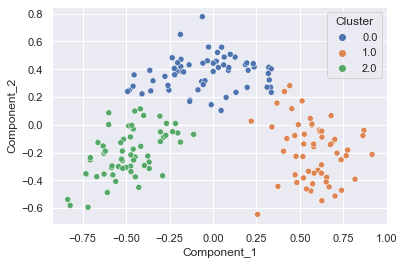

In [16]:
sns.scatterplot(data=data_comp,x="Component_1",y="Component_2",hue="Cluster",palette="deep")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Clusters proyectados')

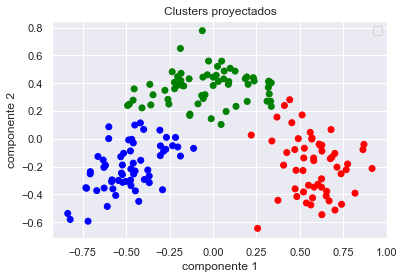

In [17]:
color_theme=np.array(["green","red","blue"])
plt.scatter(data_comp["Component_1"],data_comp["Component_2"],c=color_theme[kmean.labels_])
plt.xlabel("componente 1")
plt.ylabel("componente 2")
plt.legend(loc="best")
plt.title("Clusters proyectados")

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
 13  group            178 non-null    int32  
dtypes: float64(11), int32(1), int64(2)
memory usage: 18.9 KB


In [19]:
#ahora se realizara la separacion de datos por grupos
segmentation=lambda x:data[data.group==x]

In [20]:
#analisis del grupo 1
grupo_1=segmentation(1)
grupo_1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,group
60,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.250,1.67,680,1
61,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.980,1.59,450,1
68,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.020,1.93,750,1
70,12.29,1.61,2.21,20.4,103,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870,1
83,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.80,0.840,2.01,515,1


In [21]:
grupo_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,55.0,13.099818,0.529687,12.20,12.735,13.08,13.485,14.34
Malic,55.0,3.160909,1.179373,0.94,2.485,3.24,3.890,5.65
Ash,55.0,2.407455,0.195554,1.98,2.280,2.36,2.560,2.86
Alcalinity,55.0,21.043636,2.487879,16.00,19.500,21.00,22.500,27.00
Magnesium,55.0,98.654545,11.082549,80.00,89.000,97.00,106.000,123.00
Phenols,55.0,1.689818,0.369902,0.98,1.405,1.65,1.865,2.80
Flavanoids,55.0,0.847818,0.332118,0.34,0.590,0.75,1.095,1.59
Nonflavanoids,55.0,0.457818,0.123178,0.17,0.400,0.48,0.530,0.63
Proanthocyanins,55.0,1.133636,0.426950,0.41,0.830,1.10,1.375,2.70
Color,55.0,6.936545,2.499873,3.05,4.960,7.10,8.835,13.00


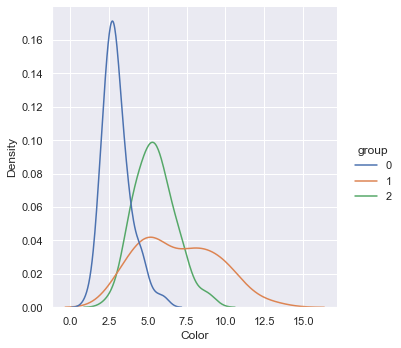

In [22]:
sns.displot(data=data,x="Color",kind="kde",hue="group",palette="deep")

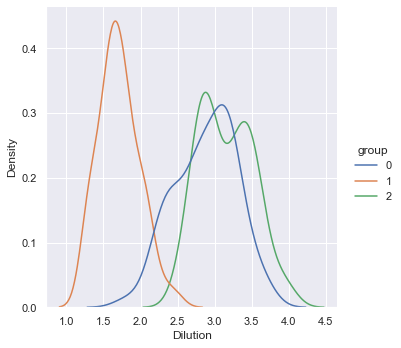

In [23]:
sns.displot(data=data,x="Dilution",kind="kde",hue="group",palette="deep")

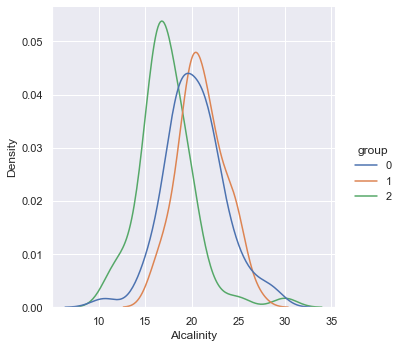

In [24]:
sns.displot(data=data,x="Alcalinity",kind="kde",hue="group",palette="deep")

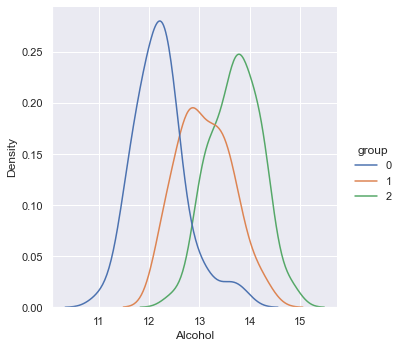

In [25]:
sns.displot(data=data,x="Alcohol",kind="kde",hue="group",palette="deep")

### Clustering jerarquico de wine

In [26]:
X=data.values

In [31]:
#cluster jerarquico con scipy
import scipy.cluster.hierarchy as sch

In [64]:
clusteres_vinos=sch.linkage(X[:20],"ward")

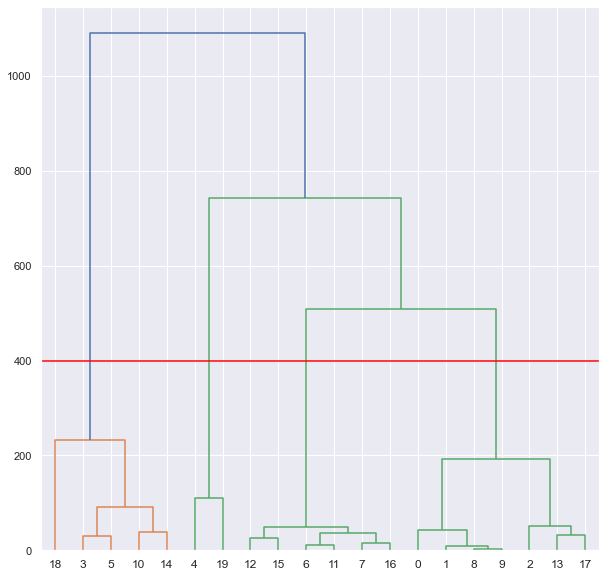

In [79]:
plt.rcParams["figure.figsize"]=(10,10)
dendrogram=sch.dendrogram(clusteres_vinos)
plt.axhline(color="red",y=400)
plt.show()

In [80]:
clusters=sch.fcluster(clusteres_vinos,t=200,criterion="distance") #la conclusion es que la distancia maxima se la lleva elcluster azul

In [81]:
len(clusters)

20

In [84]:
#como la distancia maxima ocupa el color azul con 4 clusteres. usaremos el paquete de cluster aglomerativo
from sklearn.cluster import AgglomerativeClustering

agglomerative=AgglomerativeClustering(n_clusters=4,
                                      affinity="euclidean",
                                      linkage="ward"
                                     )

In [85]:
agglomerative.fit(X[:20]);

In [87]:
agglomerative.labels_

array([1, 1, 1, 0, 2, 0, 3, 3, 1, 1, 0, 3, 3, 1, 0, 3, 3, 1, 0, 2],
      dtype=int64)

In [101]:
data_select=pd.DataFrame(X[:20],columns=[chr(i) for i in range(69,69+14)])
data_select["cluster"]=agglomerative.labels_

In [102]:
data_select

,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2.0,2
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,2.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,2.0,3
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,2.0,3
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,2.0,1
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,2.0,1


<AxesSubplot:xlabel='E', ylabel='F'>

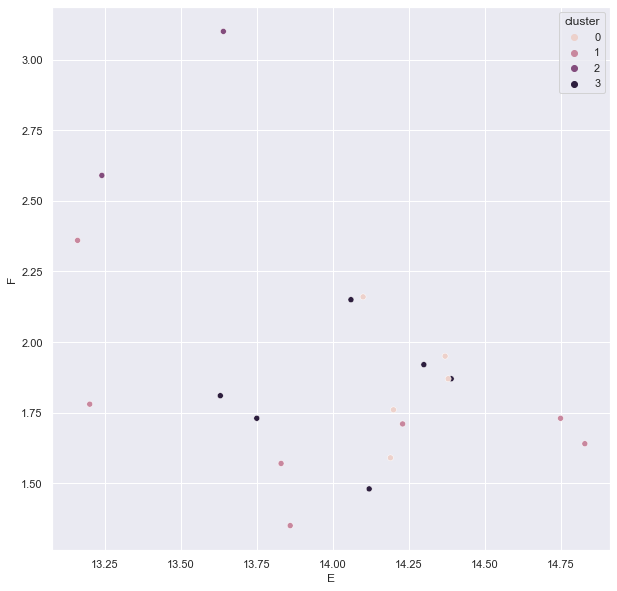

In [103]:
sns.scatterplot(data=data_select,x="E",y="F",hue="cluster")

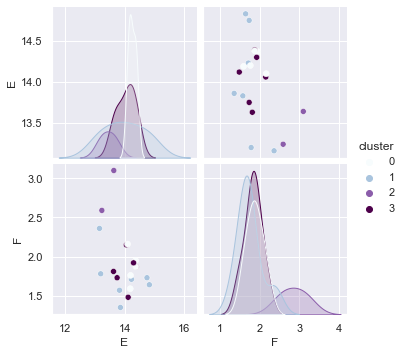

In [117]:
sns.pairplot(data=data_select.iloc[:,[0,1,-1]],hue="cluster",palette="BuPu")

<AxesSubplot:>

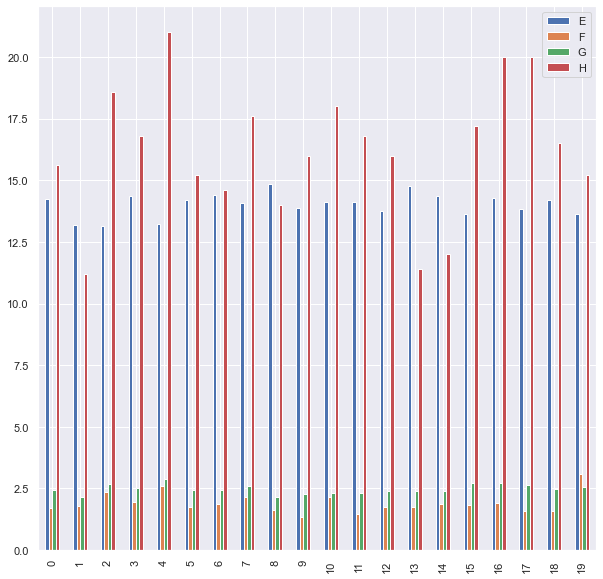

In [118]:
data_select.iloc[:,0:4].plot(kind="bar")